## Import libraries

In [1]:
import wooldridge as woo
import pandas as pd
import statsmodels.api as sm

## Load dataset

In [2]:
df = woo.data("401k")
df.head()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.100000,0.21,1653.0,6322.0,8,8709.0,0,9.072112
1,100.000000,1.42,262.0,262.0,6,315.0,1,5.752573
2,97.599998,0.91,166.0,170.0,10,275.0,1,5.616771
3,100.000000,0.42,257.0,257.0,7,500.0,0,6.214608
4,82.500000,0.53,591.0,716.0,28,933.0,1,6.838405


## (i) Find the average participation rate and contribution rate in the sample of plans

In [3]:
# Average participation rate
avg_prate = df['prate'].mean()

# Average plan generosity (contribution matching rate)
avg_mrate = df['mrate'].mean()

print(f"Average participation rate (avg_prate): {avg_prate:.2f}")
print(f"Average plan generosity (avg_mrate): {avg_mrate:.2f}")

Average participation rate (avg_prate): 87.36
Average plan generosity (avg_mrate): 0.73


## (ii) Simple regression

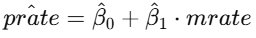

In [4]:
# Dependent variable
y = df['prate']

# Independent variable + intercept
X = sm.add_constant(df['mrate'])  # <-- call the function!

# OLS regression
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     123.7
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           1.10e-27
Time:                        15:32:52   Log-Likelihood:                -6437.0
No. Observations:                1534   AIC:                         1.288e+04
Df Residuals:                    1532   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.0755      0.563    147.484      0.0

## (iii) Interpretation of the intercept and coefficient

Intercept (83.08): This is the expected participation rate when the contribution rate $mrate$ is zero. In other words, even if the plan does not offer a firm contribution, the expected average participation rate is 83.08%.

$mrate$ coefficient (5.86): For each additional 1 percentage point in the contribution rate, the participation rate increases by 5.86 percentage points.

## (iv) Forecast when $mrate$ = 3.5

In [5]:
pred_prate = model.predict([1, 3.5])[0]  # 1 for intercept
print(f"Predicted participation rate when matching = 3.5: {pred_prate:.2f}%")

Predicted participation rate when matching = 3.5: 103.59%


The 103.59% prediction is unreasonable because prate cannot exceed 100%. This is because the linear model does not respect natural proportion constraints and because we are extrapolating beyond the observed range of mrate.

## (v) $prate$ variation explained by $mrate$

Only 7.5% of the variation in $prate$ is explained by $mrate$. Although there is a positive and statistically significant effect (t=11.12, p<0.001), most of the variation in participation (92.5%) is explained by other factors.